In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv('dados_ibovespa15anos.csv', sep=',"')

/tmp/ipython-input-178475175.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('dados_ibovespa15anos.csv', sep=',"')


In [4]:
df.head()

,Data,"Último""","Abertura""","Máxima""","Mínima""","Vol.""","Var%"""
0,"""22.07.2025""","134.036""","134.180""","135.300""","133.986""","7,05B""","-0,10%"""
1,"""21.07.2025""","134.167""","133.382""","134.865""","133.367""","6,73B""","0,59%"""
2,"""18.07.2025""","133.382""","135.562""","135.562""","133.296""","10,07B""","-1,61%"""
3,"""17.07.2025""","135.565""","135.515""","135.792""","135.016""","6,80B""","0,04%"""
4,"""16.07.2025""","135.511""","135.250""","135.641""","134.265""","7,83B""","0,19%"""


In [5]:
df.shape

(3724, 7)

In [6]:
df.columns = ['Data', 'Ultimo', 'Abertura', 'Maxima', 'Minima', 'Volume', 'Variacao']

In [7]:
df.head()

,Data,Ultimo,Abertura,Maxima,Minima,Volume,Variacao
0,"""22.07.2025""","134.036""","134.180""","135.300""","133.986""","7,05B""","-0,10%"""
1,"""21.07.2025""","134.167""","133.382""","134.865""","133.367""","6,73B""","0,59%"""
2,"""18.07.2025""","133.382""","135.562""","135.562""","133.296""","10,07B""","-1,61%"""
3,"""17.07.2025""","135.565""","135.515""","135.792""","135.016""","6,80B""","0,04%"""
4,"""16.07.2025""","135.511""","135.250""","135.641""","134.265""","7,83B""","0,19%"""


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      3724 non-null   object
 1   Ultimo    3724 non-null   object
 2   Abertura  3724 non-null   object
 3   Maxima    3724 non-null   object
 4   Minima    3724 non-null   object
 5   Volume    3724 non-null   object
 6   Variacao  3724 non-null   object
dtypes: object(7)
memory usage: 203.8+ KB


In [9]:
df.describe()

,Data,Ultimo,Abertura,Maxima,Minima,Volume,Variacao
count,3724,3724,3724,3724,3724,3724,3724
unique,3724,3614,3621,3628,3624,1317,674
top,"""15.07.2010""","49.246""","66.909""","87.333""","124.310""","4,01M""","0,51%"""
freq,1,3,3,3,3,17,21


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
for col in ['Ultimo', 'Abertura', 'Maxima', 'Minima']:
    df[col] = df[col].str.replace('"', '').str.replace('.', '').str.replace(',', '.').astype(float)

In [12]:
def tratar_volume(vol):
    vol = vol.replace('"', '').replace(',', '.').strip()

    if vol == '':
        return None  # ou np.nan

    try:
        if 'K' in vol:
            return float(vol.replace('K', '')) * 1e3
        elif 'M' in vol:
            return float(vol.replace('M', '')) * 1e6
        elif 'B' in vol:
            return float(vol.replace('B', '')) * 1e9
        else:
            return float(vol)
    except:
        return None

df['Volume'] = df['Volume'].apply(tratar_volume)

In [13]:
df['Variacao'] = df['Variacao'].str.replace('%',
                                '').str.replace(',', '.').str.replace('"', '')
df['Variacao'] = df['Variacao'].astype(float)

In [14]:
df['Data'] = pd.to_datetime(df['Data'].str.replace('"', ''), format='%d.%m.%Y')

In [15]:
df.sort_values('Data', inplace=True)
df.reset_index(drop=True, inplace=True)

In [16]:
df.head()

,Data,Ultimo,Abertura,Maxima,Minima,Volume,Variacao
0,2010-07-15,63489.0,63482.0,63612.0,62960.0,1560000.0,0.02
1,2010-07-16,62339.0,63487.0,63492.0,62298.0,1330000.0,-1.81
2,2010-07-19,63297.0,62351.0,63300.0,62351.0,1280000.0,1.54
3,2010-07-20,64462.0,63290.0,64481.0,62902.0,2430000.0,1.84
4,2010-07-21,64477.0,64468.0,65136.0,64209.0,1820000.0,0.02


In [17]:
df.shape

(3724, 7)

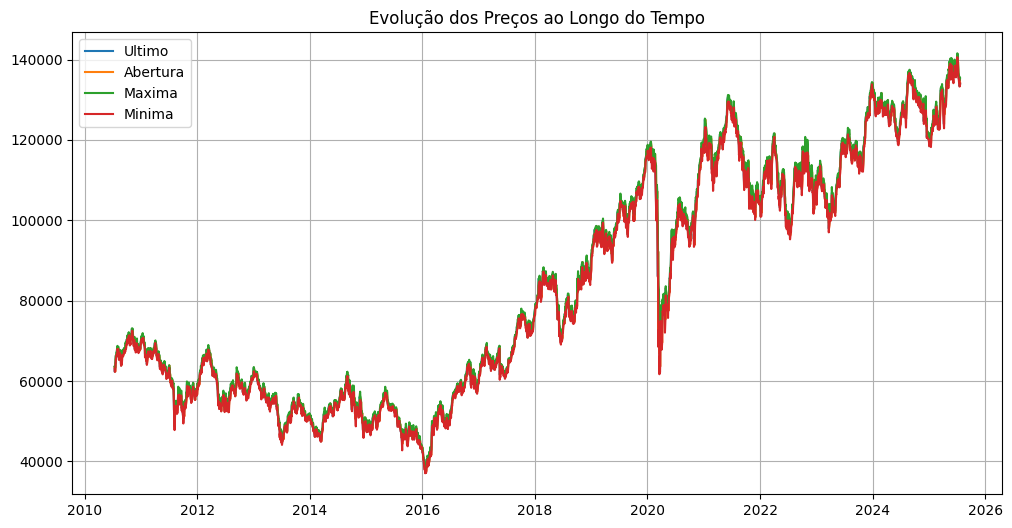

In [18]:
# Linha Temporal dos Preços
df['Data'] = pd.to_datetime(df['Data'])
df.sort_values('Data', inplace=True)

plt.figure(figsize=(12, 6))
for col in ['Ultimo', 'Abertura', 'Maxima', 'Minima']:
    plt.plot(df['Data'], df[col], label=col)
plt.title('Evolução dos Preços ao Longo do Tempo')
plt.legend()
plt.grid()
plt.show()

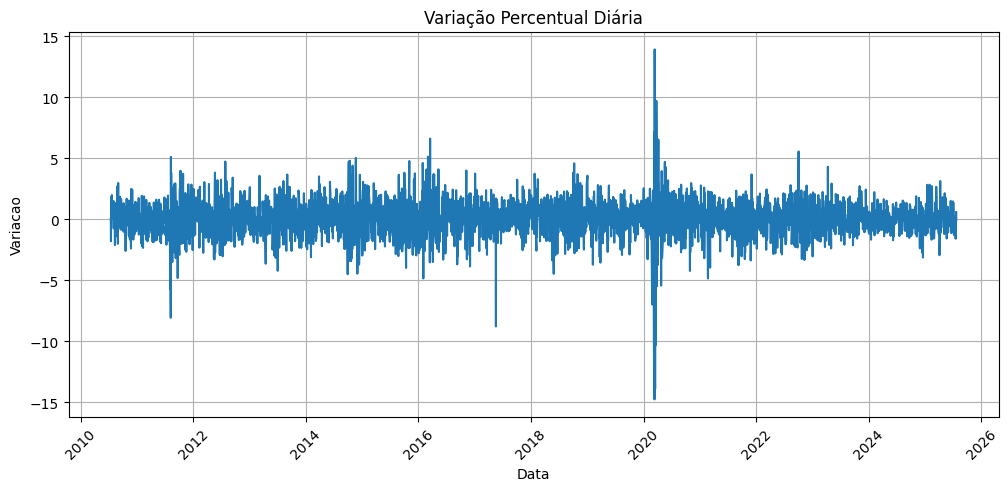

In [19]:
# Variação Percentual ao Longo do Tempo
df['Variacao'] = df['Variacao']
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['Data'], y=df['Variacao'])
plt.title('Variação Percentual Diária')
plt.xticks(rotation=45)
plt.grid()

Text(0.5, 1.0, 'Distribuição das Variações Diárias (%)')

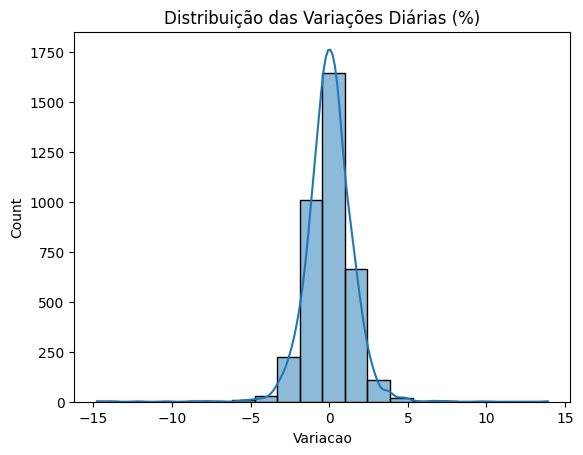

In [20]:
# Distribuição das Variações Diárias
sns.histplot(df['Variacao'], kde=True, bins=20)
plt.title('Distribuição das Variações Diárias (%)')

Text(0.5, 1.0, 'Boxplot dos Preços')

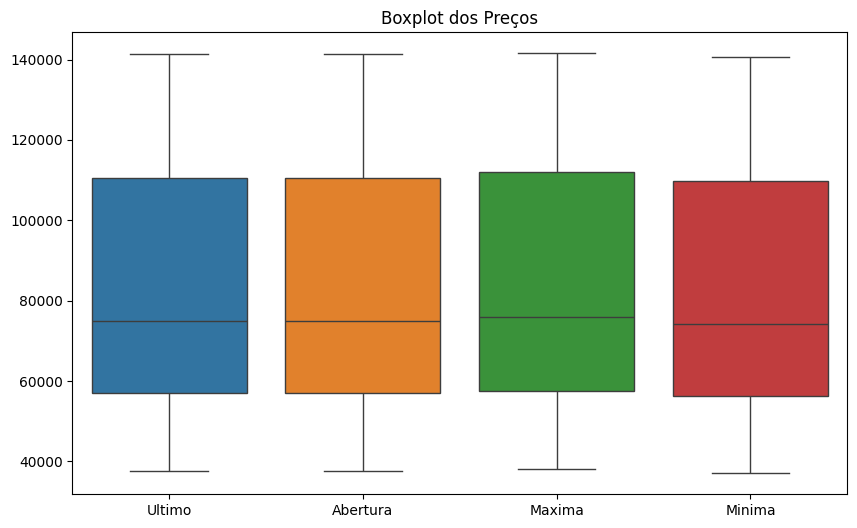

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Ultimo', 'Abertura', 'Maxima', 'Minima']])
plt.title('Boxplot dos Preços')

In [22]:
df['Target'] = (df['Ultimo'].shift(-1) > df['Ultimo']).astype(int)
df.dropna(inplace=True)

In [23]:
# Retornos passados
df['Retorno_1d'] = df['Ultimo'].pct_change(1)
df['Retorno_3d'] = df['Ultimo'].pct_change(3)
df['Retorno_7d'] = df['Ultimo'].pct_change(7)

# Médias móveis
df['SMA_5'] = df['Ultimo'].rolling(5).mean()
df['SMA_10'] = df['Ultimo'].rolling(10).mean()

# Volatilidade (desvio padrão)
df['Vol_5'] = df['Ultimo'].rolling(5).std()
df['Vol_10'] = df['Ultimo'].rolling(10).std()

In [24]:
df['Ultimo_Seguinte'] = df['Ultimo'].shift(-1)
df['tendencia'] = (df['Ultimo_Seguinte'] > df['Ultimo']).astype(int)

# Remover a última linha (sem valor futuro)
df.dropna(inplace=True)

In [25]:
for lag in range(1, 4):
    df[f'lag_Ultimo_{lag}'] = df['Ultimo'].shift(lag)
    df[f'lag_Variacao_{lag}'] = df['Variacao'].shift(lag)
    df[f'lag_Volume_{lag}'] = df['Volume'].shift(lag)

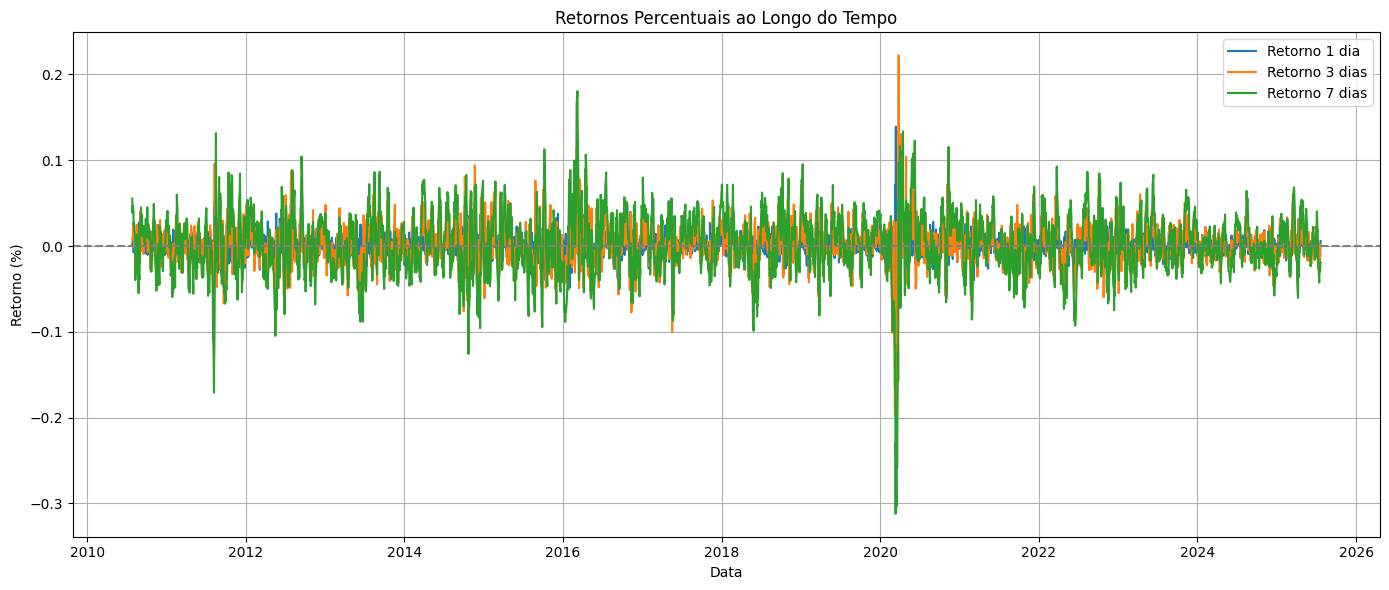

In [26]:
plt.figure(figsize=(14, 6))
plt.plot(df['Data'], df['Retorno_1d'], label='Retorno 1 dia')
plt.plot(df['Data'], df['Retorno_3d'], label='Retorno 3 dias')
plt.plot(df['Data'], df['Retorno_7d'], label='Retorno 7 dias')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Retornos Percentuais ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Retorno (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

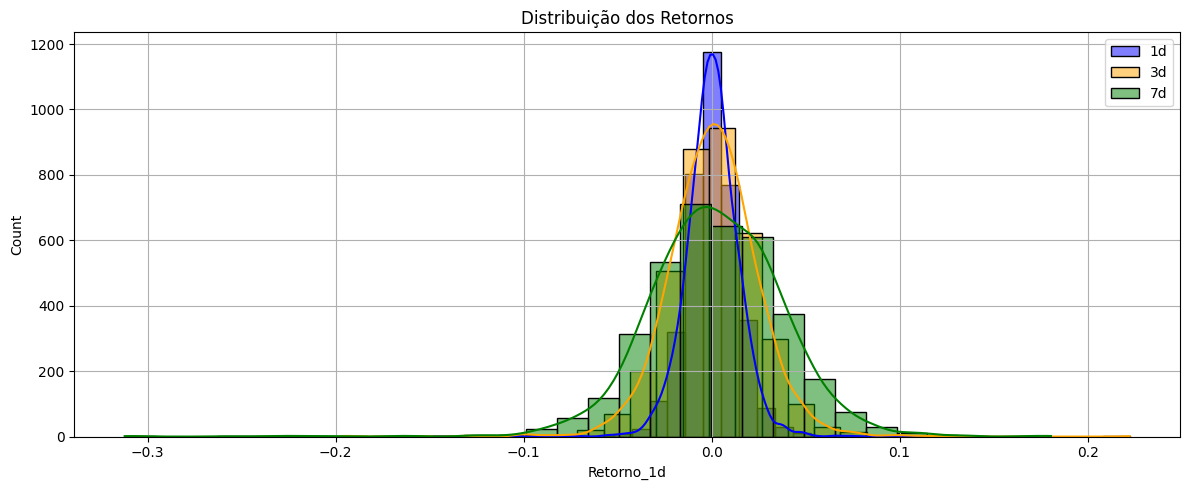

In [27]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Retorno_1d'], kde=True, bins=30, label='1d', color='blue')
sns.histplot(df['Retorno_3d'], kde=True, bins=30, label='3d', color='orange')
sns.histplot(df['Retorno_7d'], kde=True, bins=30, label='7d', color='green')
plt.title("Distribuição dos Retornos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

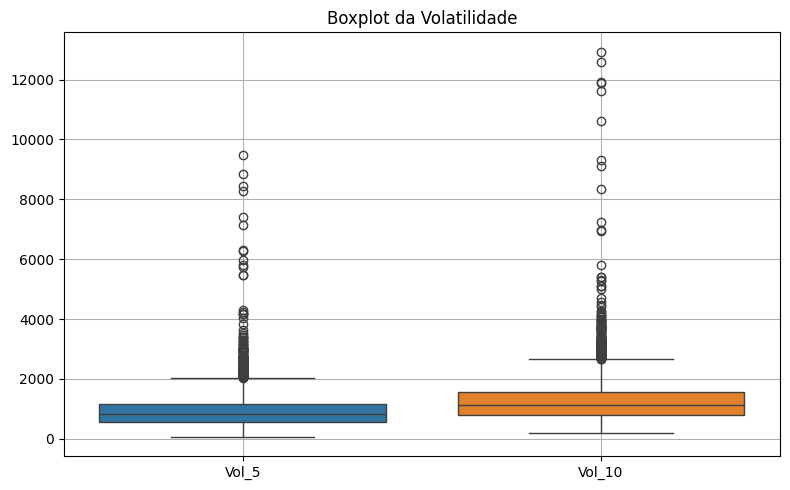

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Vol_5', 'Vol_10']])
plt.title("Boxplot da Volatilidade")
plt.grid(True)
plt.tight_layout()
plt.show()

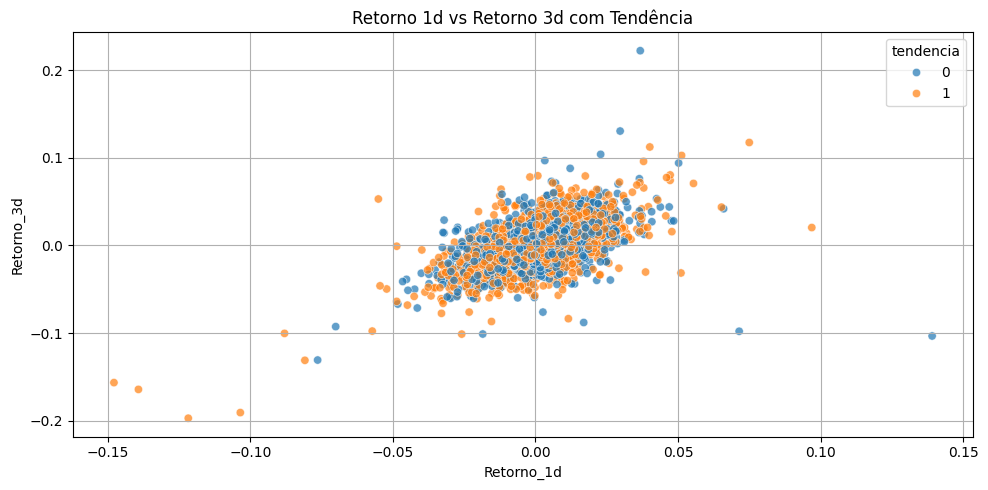

In [29]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Retorno_1d', y='Retorno_3d', hue='tendencia', alpha=0.7)
plt.title("Retorno 1d vs Retorno 3d com Tendência")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Selecionando features técnicas e de mercado
features = [
    'lag_Ultimo_1', 'lag_Ultimo_2', 'lag_Ultimo_3',
    'lag_Variacao_1', 'lag_Variacao_2', 'lag_Variacao_3',
    'lag_Volume_1', 'lag_Volume_2', 'lag_Volume_3', 'Retorno_1d', 'Retorno_3d',
    'Retorno_7d', 'SMA_5', 'SMA_10',
       'Vol_5', 'Vol_10', 'Ultimo_Seguinte'
]

In [31]:
features2 = ['lag_Variacao_2', 'lag_Variacao_3',
    'lag_Volume_1', 'lag_Volume_2', 'lag_Volume_3', 'Retorno_1d',
    'Retorno_3d', 'Retorno_7d',
       'Vol_5', 'Vol_10', 'Ultimo_Seguinte'
]

In [32]:
df = df.dropna().copy()

In [33]:
df.columns

Index(['Data', 'Ultimo', 'Abertura', 'Maxima', 'Minima', 'Volume', 'Variacao',
       'Target', 'Retorno_1d', 'Retorno_3d', 'Retorno_7d', 'SMA_5', 'SMA_10',
       'Vol_5', 'Vol_10', 'Ultimo_Seguinte', 'tendencia', 'lag_Ultimo_1',
       'lag_Variacao_1', 'lag_Volume_1', 'lag_Ultimo_2', 'lag_Variacao_2',
       'lag_Volume_2', 'lag_Ultimo_3', 'lag_Variacao_3', 'lag_Volume_3'],
      dtype='object')

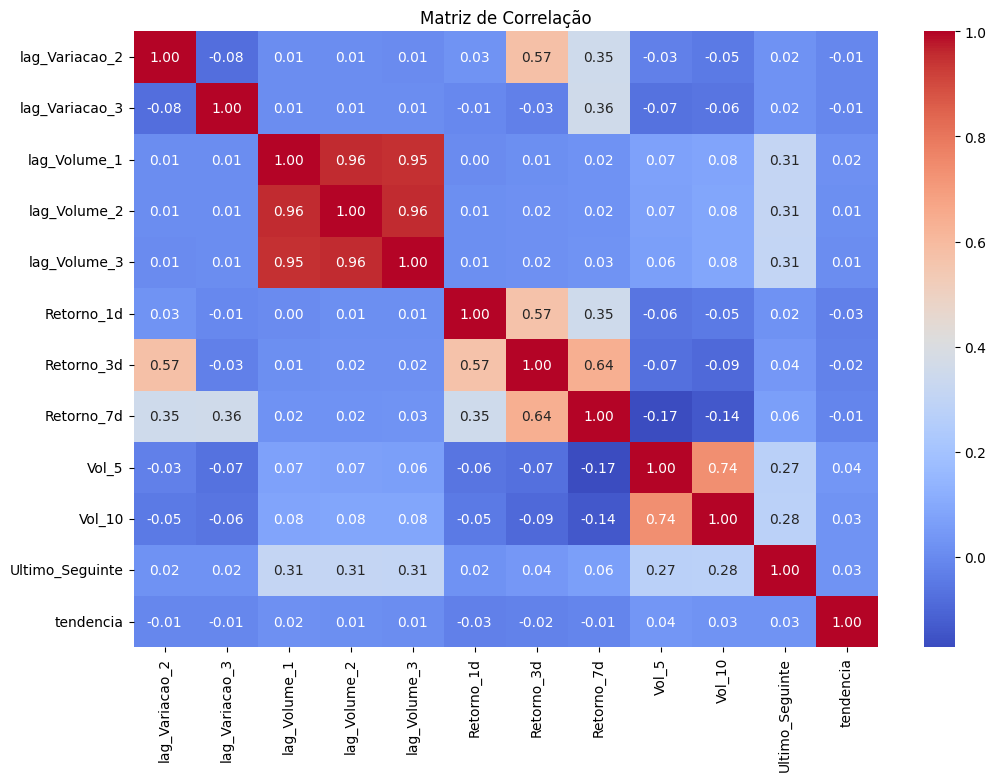

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adiciona a variável alvo temporariamente
df_corr = df[features2 + ['tendencia']].copy()

# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [35]:
X = df[features]
y = df['tendencia']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Avaliação
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia com Lags (Logistic Regression): {acc:.2%}")
print(classification_report(y_test, y_pred))

Acurácia com Lags (Logistic Regression): 85.80%
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       545
           1       0.85      0.87      0.86       568

    accuracy                           0.86      1113
   macro avg       0.86      0.86      0.86      1113
weighted avg       0.86      0.86      0.86      1113



In [36]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=42))
])

# Treinamento
pipeline_rf.fit(X_train, y_train)

# Predição
y_pred_rf = pipeline_rf.predict(X_test)

# Avaliação
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia com Lags (Random Forest): {acc_rf:.2%}")
print(classification_report(y_test, y_pred_rf))

Acurácia com Lags (Random Forest): 58.40%
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       545
           1       0.59      0.63      0.61       568

    accuracy                           0.58      1113
   macro avg       0.58      0.58      0.58      1113
weighted avg       0.58      0.58      0.58      1113



In [37]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # Opcional no XGBoost
    ('xgb', XGBClassifier(
        n_estimators=2000,
        max_depth=20,
        learning_rate=0.3,
        use_label_encoder=False,
        eval_metric='error',
        random_state=42
    ))
])

# Treinamento
pipeline_xgb.fit(X_train, y_train)

# Predição
y_pred_xgb = pipeline_xgb.predict(X_test)

# Avaliação
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia com Lags (XGBoost): {acc_xgb:.2%}")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:31:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia com Lags (XGBoost): 72.42%
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       545
           1       0.71      0.77      0.74       568

    accuracy                           0.72      1113
   macro avg       0.73      0.72      0.72      1113
weighted avg       0.73      0.72      0.72      1113



In [38]:
print(df['tendencia'].value_counts(normalize=True))

tendencia
1    0.510782
0    0.489218
Name: proportion, dtype: float64


Acurácia (Treino): 87.02%
Acurácia (Teste): 85.80%

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       545
           1       0.85      0.87      0.86       568

    accuracy                           0.86      1113
   macro avg       0.86      0.86      0.86      1113
weighted avg       0.86      0.86      0.86      1113



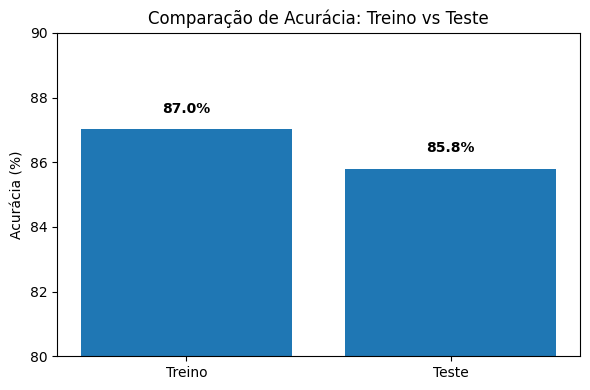

In [39]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Acurácias
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

# Relatório de teste
print(f"Acurácia (Treino): {acc_train:.2%}")
print(f"Acurácia (Teste): {acc_test:.2%}")
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_test))

# Gráfico comparativo
labels = ['Treino', 'Teste']
valores = [acc_train * 100, acc_test * 100]

plt.figure(figsize=(6, 4))
plt.bar(labels, valores)
plt.ylim(80, 90)
plt.ylabel('Acurácia (%)')
plt.title('Comparação de Acurácia: Treino vs Teste')

# Mostrar os valores nas barras
for i, v in enumerate(valores):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Acurácia no último mês (30 dias): 76.67%
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.71      0.77      0.74        13

    accuracy                           0.77        30
   macro avg       0.76      0.77      0.76        30
weighted avg       0.77      0.77      0.77        30



<Axes: title={'center': 'Fechamento Diário do IBOVESPA'}, xlabel='Data'>

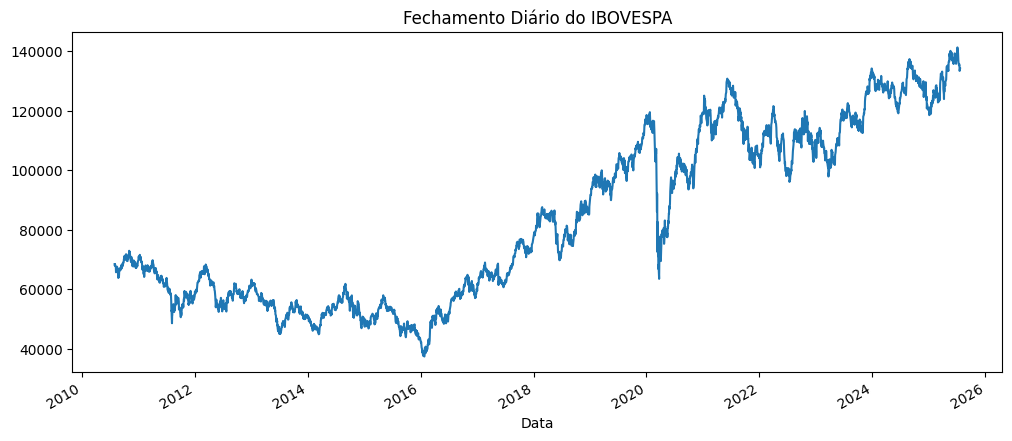

In [40]:
ultimo_mes = df.tail(30).copy()
dados_treino = df.iloc[:-30].copy()

# Features e alvo
X_train = dados_treino[features]
y_train = dados_treino['tendencia']

X_test_final = ultimo_mes[features]
y_test_final = ultimo_mes['tendencia']

# Passo 2 e 3: Treinar e prever
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred_final = pipeline.predict(X_test_final)

# Passo 4: Avaliar
from sklearn.metrics import accuracy_score, classification_report

acc_final = accuracy_score(y_test_final, y_pred_final)
print(f"\nAcurácia no último mês (30 dias): {acc_final:.2%}")
print(classification_report(y_test_final, y_pred_final))

# %%
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data')['Ultimo'].plot(figsize=(12, 5),
                                    title='Fechamento Diário do IBOVESPA')

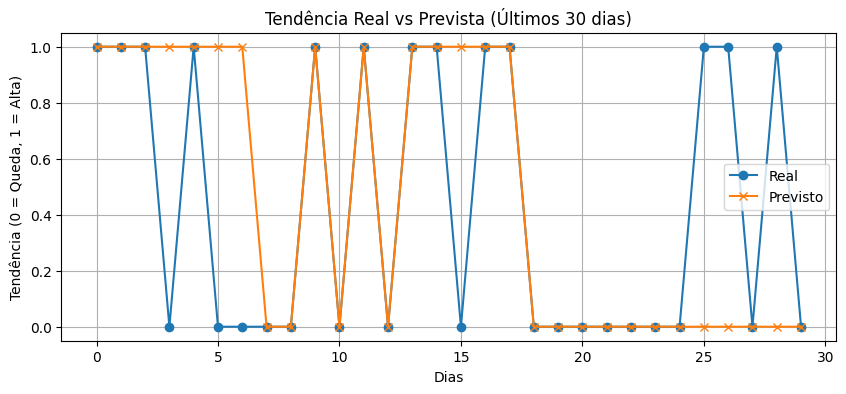

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test_final.values, label='Real', marker='o')
plt.plot(y_pred_final, label='Previsto', marker='x')
plt.title("Tendência Real vs Prevista (Últimos 30 dias)")
plt.xlabel("Dias")
plt.ylabel("Tendência (0 = Queda, 1 = Alta)")
plt.legend()
plt.grid(True)

Text(0.5, 1.0, 'Matriz de Confusão - Último mês')

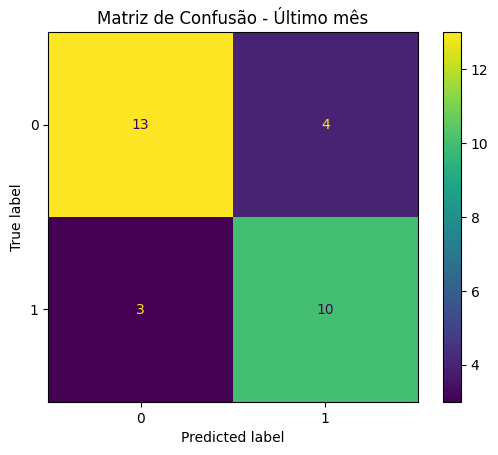

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(pipeline, X_test_final, y_test_final)
plt.title("Matriz de Confusão - Último mês")

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'lag_Ultimo_1'),
  Text(1, 0, 'lag_Variacao_1'),
  Text(2, 0, 'lag_Volume_1'),
  Text(3, 0, 'lag_Ultimo_2'),
  Text(4, 0, 'lag_Variacao_2'),
  Text(5, 0, 'lag_Volume_2'),
  Text(6, 0, 'lag_Ultimo_3'),
  Text(7, 0, 'lag_Variacao_3'),
  Text(8, 0, 'lag_Volume_3')])

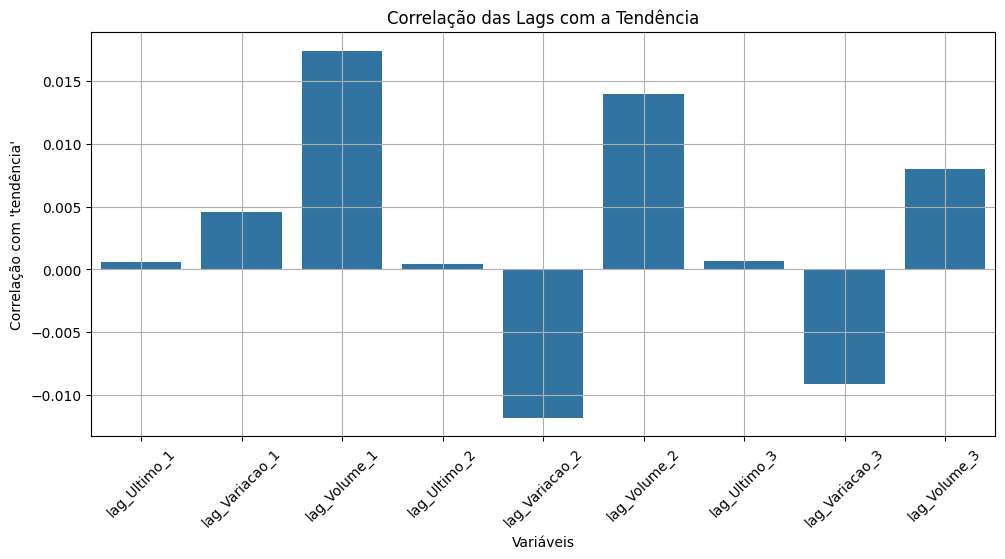

In [43]:
lags_cols = [col for col in df.columns if col.startswith("lag_")]
correlacoes = df[lags_cols + ['tendencia']].corr()['tendencia'].drop('tendencia')

plt.figure(figsize=(10, 5))
sns.barplot(x=correlacoes.index, y=correlacoes.values)
plt.title("Correlação das Lags com a Tendência")
plt.tight_layout()
plt.ylabel("Correlação com 'tendência'")
plt.xlabel("Variáveis")
plt.grid(True)
plt.xticks(rotation=45)

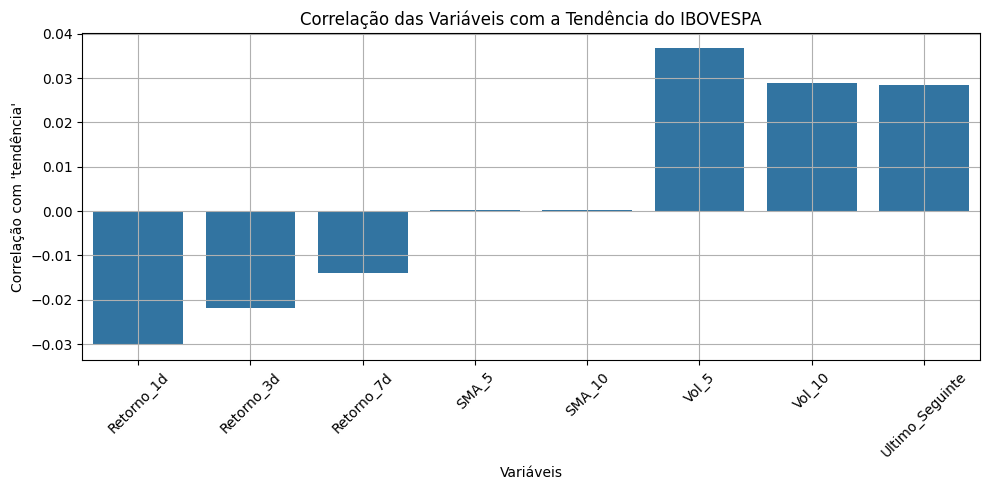

In [44]:
# Lista de variáveis que você quer avaliar a correlação com a tendência
variaveis = ['Retorno_1d', 'Retorno_3d', 'Retorno_7d',
             'SMA_5', 'SMA_10',
             'Vol_5', 'Vol_10', 'Ultimo_Seguinte', 'tendencia']

# Calcula a correlação com a tendência
correlacoes = df[variaveis].corr()['tendencia'].drop('tendencia')

# Plota o gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=correlacoes.index, y=correlacoes.values)
plt.title("Correlação das Variáveis com a Tendência do IBOVESPA")
plt.ylabel("Correlação com 'tendência'")
plt.xlabel("Variáveis")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

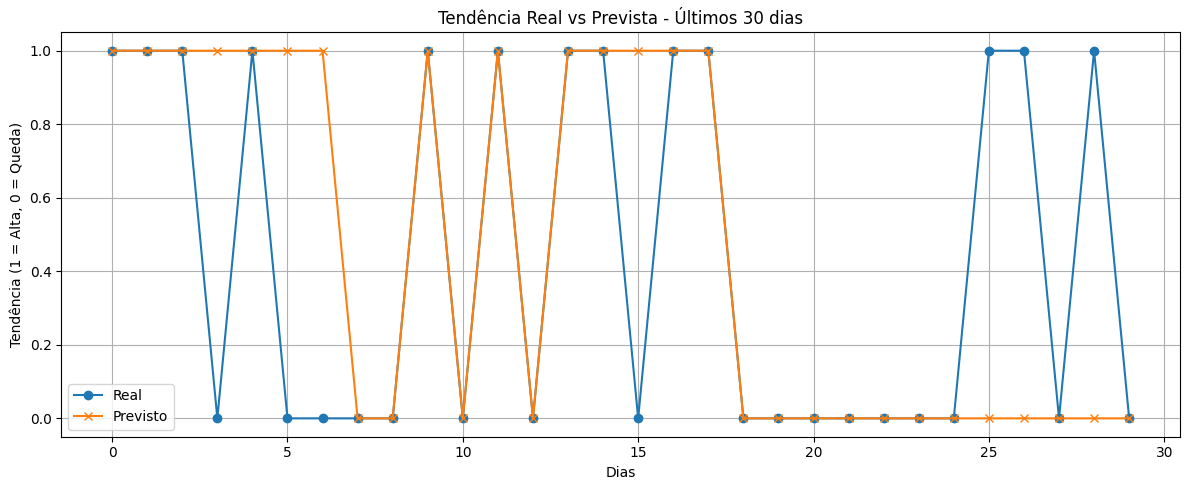

In [45]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_final.reset_index(drop=True), label='Real', marker='o')
plt.plot(y_pred_final, label='Previsto', marker='x')
plt.title('Tendência Real vs Prevista - Últimos 30 dias')
plt.xlabel('Dias')
plt.ylabel('Tendência (1 = Alta, 0 = Queda)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

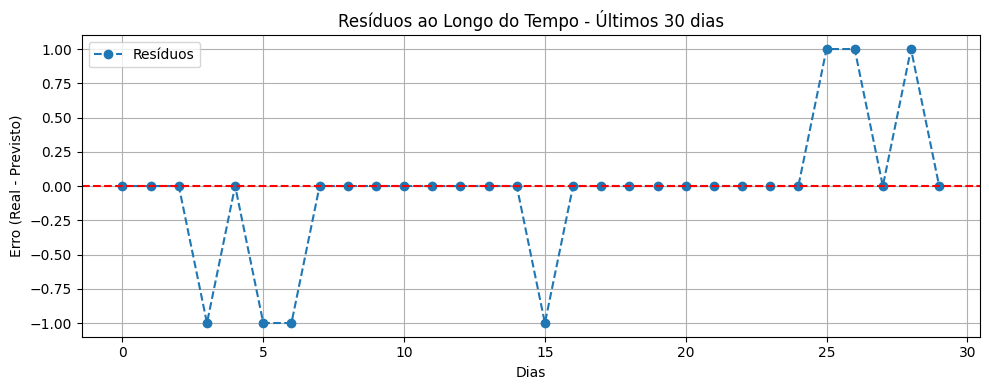

In [46]:
import statsmodels.api as sm

# %%
residuos = y_test_final.reset_index(drop=True) - y_pred_final

# %%
plt.figure(figsize=(10, 4))
plt.plot(residuos, marker='o', linestyle='--', label='Resíduos')
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos ao Longo do Tempo - Últimos 30 dias")
plt.xlabel("Dias")
plt.ylabel("Erro (Real - Previsto)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

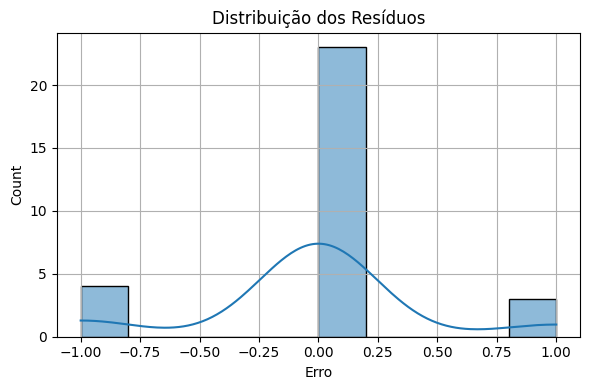

In [47]:
plt.figure(figsize=(6, 4))
sns.histplot(residuos, bins=10, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro")
plt.grid(True)
plt.tight_layout()
plt.show()